# Statistical Thinking in Python

## Graphical exploratory data analysis

        Explanatory data analysis can never be the whole story, 
        but nothing else can serve as the foundation stone -- John Tukey 

### Plotting a histogram of iris data

In [4]:
import numpy as np
versicolor_petal_length = np.genfromtxt('datasets/versicolor_petal_length.txt', delimiter=',')
print(versicolor_petal_length)

[ 4.7  4.5  4.9  4.   4.6  4.5  4.7  3.3  4.6  3.9  3.5  4.2  4.   4.7  3.6
  4.4  4.5  4.1  4.5  3.9  4.8  4.   4.9  4.7  4.3  4.4  4.8  5.   4.5  3.5
  3.8  3.7  3.9  5.1  4.5  4.5  4.7  4.4  4.1  4.   4.4  4.6  4.   3.3  4.2
  4.2  4.2  4.3  3.   4.1]


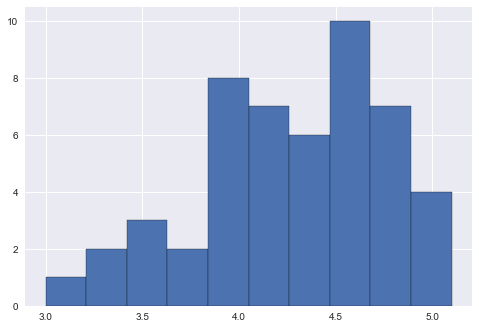

In [14]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Force to show outlines or borders on bins
plt.rcParams["patch.force_edgecolor"] = True

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

### Axis labels!

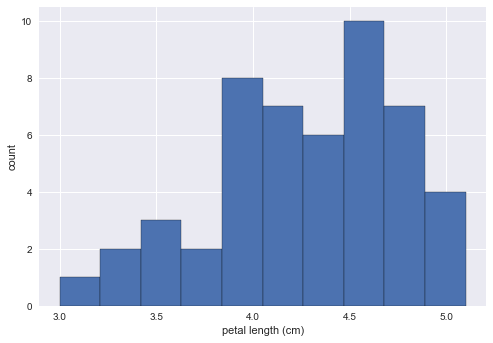

In [15]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram

plt.show()

### Adjusting the number of bins in a histogram

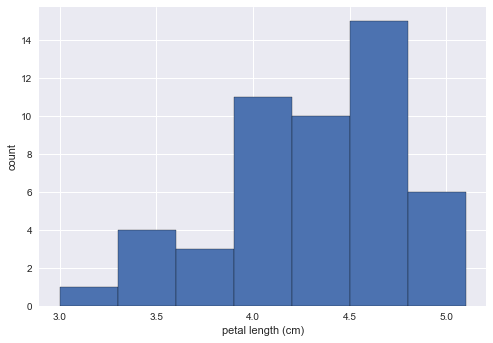

In [16]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()
